In [105]:
import numpy as np
import vampyr3d as vp

from numpy import pi

from math import isclose

min_scale = -2
max_depth = 25
order = 5
prec = 1e-3

corner = [0, 0, 0]
box = 2
boxes = [box, box, box]



world = vp.BoundingBox(min_scale, corner, boxes)
basis = vp.InterpolatingBasis(order)
MRA = vp.MultiResolutionAnalysis(world, basis, max_depth)
mid = MRA.getWorldBox().getBoxLength(1)/2.0

scaling = 2.0*pi


def phi_exact(x):
    beta = 100.0
    alpha = (beta/np.pi)**(3/2)

    return alpha*np.exp(-beta*((scaling*x[0] - scaling*mid)**2 + (scaling*x[1] - scaling*mid)**2 + (scaling*x[2] - scaling*mid)**2))


def v_helm(x):
    mu = 10.0
    beta = 100.0
    alpha = (beta/np.pi)**(3/2)
    coef = -6.0*beta + 4*beta**2*(scaling*x[0] - scaling*mid)**2 +\
        4*beta**2*(scaling*x[1]-scaling*mid)**2 + 4*beta**2*(scaling*x[2]-scaling*mid)**2 - mu**2

    return (-1/(4.0*np.pi))*alpha*coef*np.exp(-beta*((scaling*x[0]-scaling*mid)**2 +
                                              (scaling*x[1]-scaling*mid)**2 + (scaling*x[2]-scaling*mid)**2))


def v_pois(x):
    beta = 100.0
    alpha = (beta/np.pi)**(3/2)
    coef = -6.0*beta + 4*beta**2*(scaling*x[0]-scaling*mid)**2 +\
        4*beta**2*(scaling*x[1]-scaling*mid)**2 + 4*beta**2*(scaling*x[2]-scaling*mid)**2

    return (-1/(4.0*np.pi))*alpha*coef*np.exp(-beta*((scaling*x[0]-scaling*mid)**2 +
                                              (scaling*x[1]-scaling*mid)**2 + (scaling*x[2]-scaling*mid)**2))

H = vp.HelmholtzOperator(MRA, 10.0, prec)
P = vp.PoissonOperator(MRA, prec)



In [106]:
phi_tree = vp.FunctionTree(MRA)
phi_tree_pois = vp.FunctionTree(MRA)
v_tree = vp.FunctionTree(MRA)
v_tree_pois = vp.FunctionTree(MRA)
exact_tree = vp.FunctionTree(MRA)

In [107]:
vp.project(prec, v_tree, v_helm)
vp.project(prec, v_tree_pois, v_pois)
vp.project(prec, exact_tree, phi_exact)

vp.apply(prec, phi_tree, H, v_tree)
vp.apply(prec, phi_tree_pois, P, v_tree_pois)

In [108]:
import matplotlib.pyplot as plt

x = np.arange(0, MRA.getWorldBox().getBoxLength(2), .01)

def give_y(x):
    y = np.empty(x.size, dtype=float)
    for i in range(x.size):
        tmp = x[i]
        y[i] = phi_tree.evalf([tmp, mid, mid])
    return y

def give_y_pois(x):
    y = np.empty(x.size, dtype=float)
    for i in range(x.size):
        tmp = x[i]
        y[i] = phi_tree_pois.evalf([tmp, mid, mid])
    return y


def give_y_exact(x):
    y = np.empty(x.size, dtype=float)
    for i in range(x.size):
        tmp = x[i]
        y[i] = phi_exact([tmp, mid, mid])
    return y

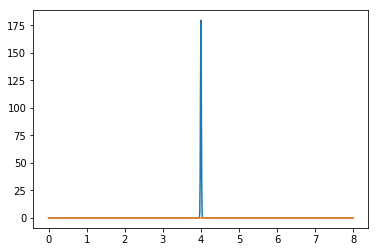

In [117]:
y = give_y(x)
y_pois = give_y_pois(x)
y_exact = give_y_exact(x)

plt.plot(x, y_exact)
plt.plot(x, y_pois)
plt.show()

In [116]:
exact_tree.integrate()

2.5247835620864383e-23

In [111]:
phi_tree_pois.integrate()*2**5

0.0

In [115]:
phi_exact([mid, mid, mid])

179.58712212516656

In [113]:
phi_tree.evalf([mid-.05, mid, mid])

0.0

In [119]:
2950000-2485000-250000

215000